<a href="https://colab.research.google.com/github/Thejasmayur31/SCT_DS_4/blob/main/SCT_DS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,6)
sns.set_style('whitegrid')


df = pd.read_csv('/content/only_road_accidents_data_month2.csv')
print('Rows, Cols:', df.shape)
df.head(3)


Rows, Cols: (490, 15)


,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180


In [2]:
df.isnull().sum()

,0
STATE/UT,0
YEAR,0
JANUARY,0
FEBRUARY,0
MARCH,0
APRIL,0
MAY,0
JUNE,0
JULY,0
AUGUST,0


In [3]:

df.columns = df.columns.str.strip().str.title()  # standardise column names


months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']


df.rename(columns={'Septembe':'September'}, inplace=True)


In [4]:
df.head()

,State/Ut,Year,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [5]:

df_long = df.melt(id_vars=['State/Ut','Year','Total'],
                  value_vars=months,
                  var_name='Month', value_name='Accidents')


df_long['Month'] = pd.Categorical(df_long['Month'], categories=months, ordered=True)
df_long.head()


,State/Ut,Year,Total,Month,Accidents
0,A & N Islands,2001,181,January,8
1,A & N Islands,2002,168,January,12
2,A & N Islands,2003,180,January,19
3,A & N Islands,2004,215,January,21
4,A & N Islands,2005,206,January,19


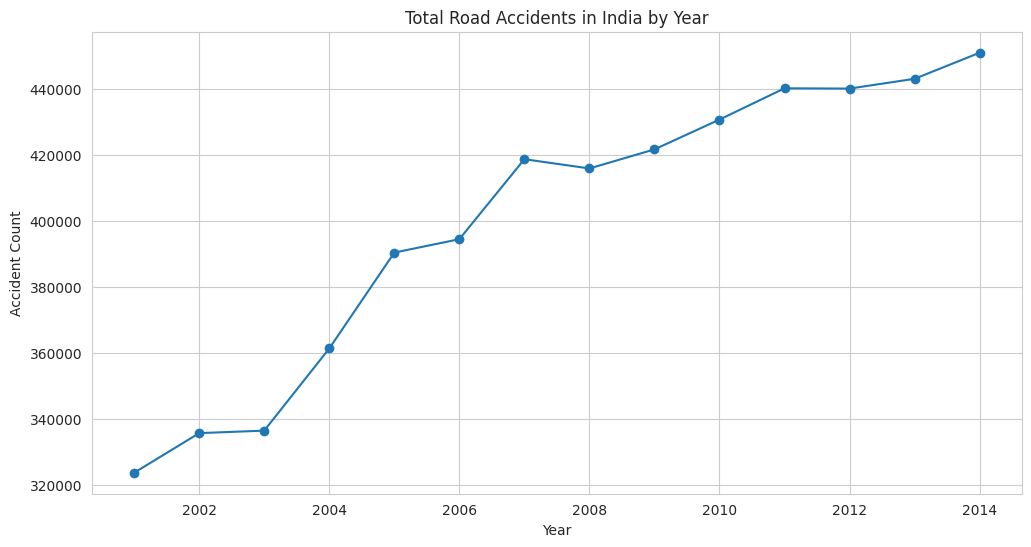

In [6]:
national = df.groupby('Year')['Total'].sum()
national.plot(marker='o')
plt.title('Total Road Accidents in India by Year')
plt.ylabel('Accident Count')
plt.show()


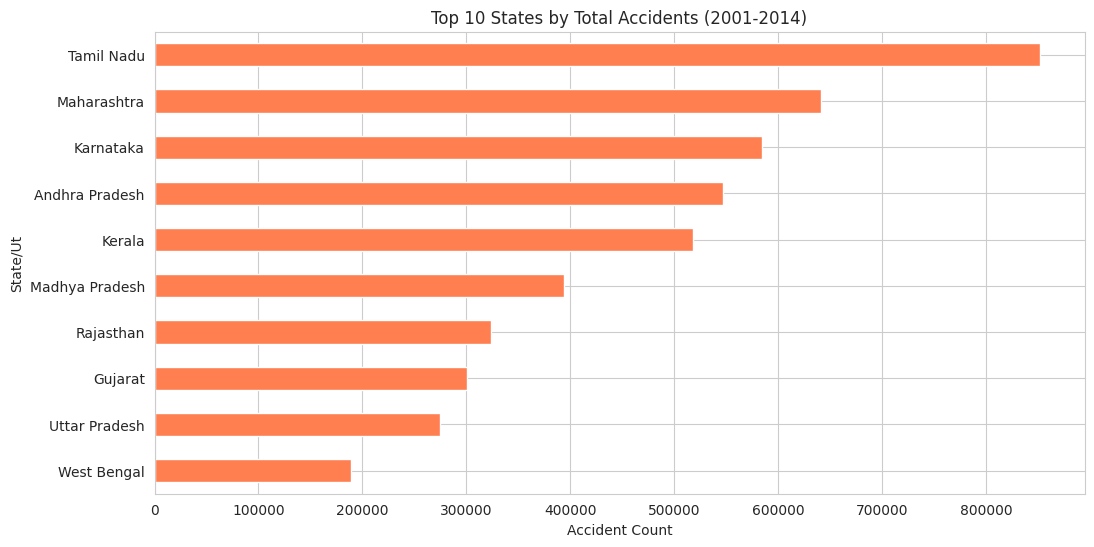

In [7]:
top_states = df.groupby('State/Ut')['Total'].sum().nlargest(10)
top_states.sort_values().plot(kind='barh', color='coral')
plt.title('Top 10 States by Total Accidents (2001‑2014)')
plt.xlabel('Accident Count')
plt.show()


/tmp/ipython-input-8-3020907767.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_long.pivot_table(index='Month', columns='Year',


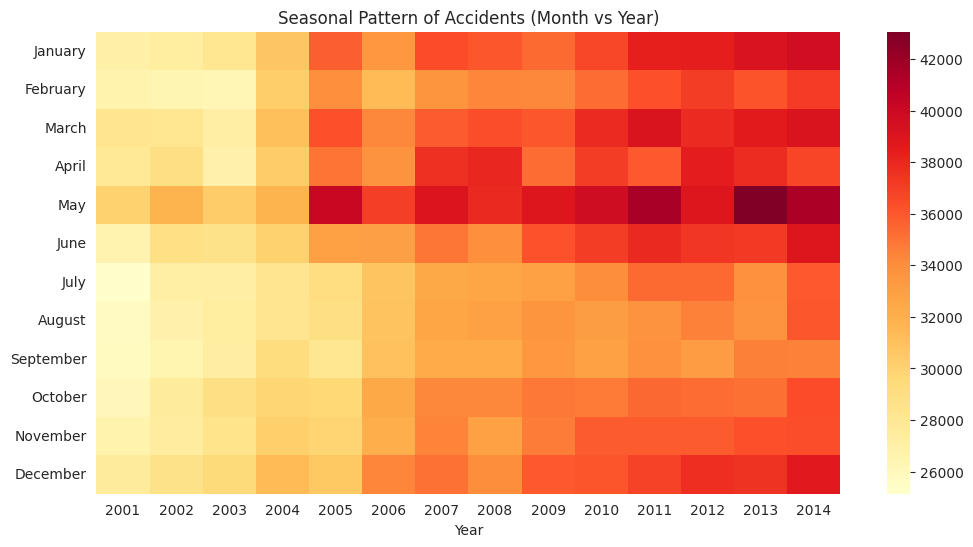

In [8]:
pivot = df_long.pivot_table(index='Month', columns='Year',
                            values='Accidents', aggfunc='sum')
sns.heatmap(pivot, cmap='YlOrRd')
plt.title('Seasonal Pattern of Accidents (Month vs Year)')
plt.ylabel('')
plt.show()


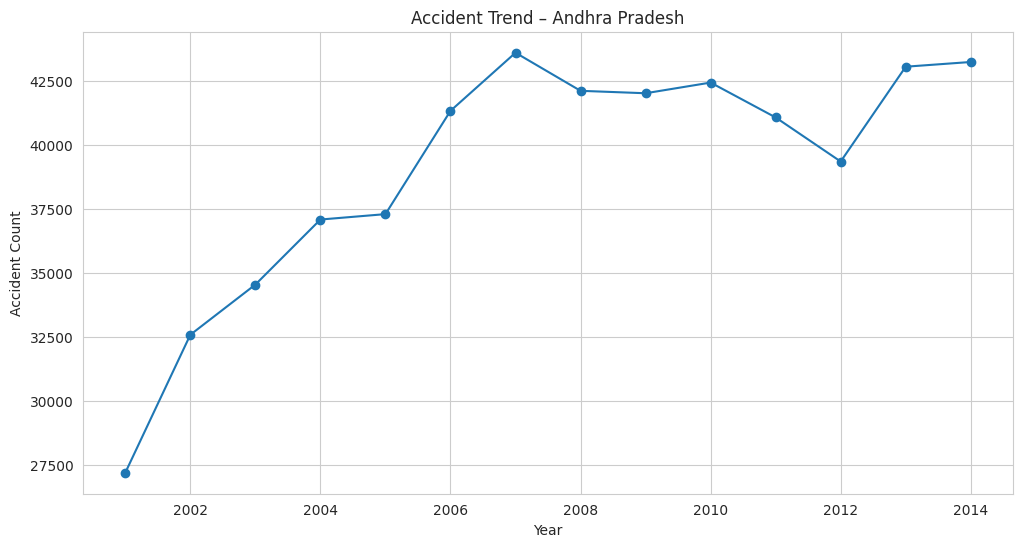

In [9]:
def plot_state(state):
    series = df[df['State/Ut'] == state].set_index('Year')['Total']
    series.plot(marker='o')
    plt.title(f'Accident Trend – {state}')
    plt.ylabel('Accident Count')
    plt.show()

plot_state('Andhra Pradesh')  # 🔄 change state name to explore others


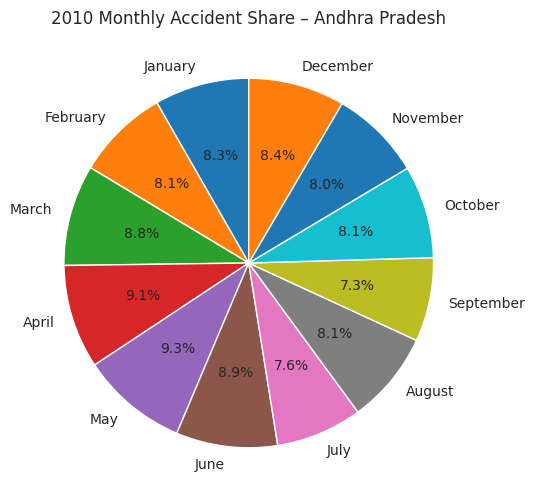

In [10]:
sample = df_long[(df_long['State/Ut']=='Andhra Pradesh') & (df_long['Year']==2010)]
sample = sample.set_index('Month')['Accidents']
sample.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('2010 Monthly Accident Share – Andhra Pradesh')
plt.ylabel('')
plt.show()


* Andhra Pradesh shows a consistent year‑on‑year rise until 2007, then a plateau.
* Nationally, accidents peak around **May–July**, coinciding with monsoon onset in many states.
* Seasonal heatmap highlights that winter months (Jan–Feb) tend to record fewer crashes overall.
* The top three high‑risk states account for over **35 %** of all recorded accidents in this period.
